In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
heart_disease=pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [5]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [7]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
clf=RandomForestClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.819672131147541

In [8]:
for i in range(10,100,10):
    np.random.seed(42)
    print(f"For n_estimators= {i} ")
    clf=RandomForestClassifier(n_estimators=i)
    clf.fit(X_train,y_train)
    print(f"Accuracy is {clf.score(X_test,y_test)*100}%")

For n_estimators= 10 
Accuracy is 72.1311475409836%
For n_estimators= 20 
Accuracy is 80.32786885245902%
For n_estimators= 30 
Accuracy is 80.32786885245902%
For n_estimators= 40 
Accuracy is 77.04918032786885%
For n_estimators= 50 
Accuracy is 78.68852459016394%
For n_estimators= 60 
Accuracy is 80.32786885245902%
For n_estimators= 70 
Accuracy is 81.9672131147541%
For n_estimators= 80 
Accuracy is 83.60655737704919%
For n_estimators= 90 
Accuracy is 81.9672131147541%


In [9]:
car_sales=pd.read_csv("data\car-sales-extended-missing-data.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [10]:
car_sales.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [11]:
car_sales.dropna(subset="Price",inplace=True)

In [12]:
car_sales.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [13]:
car_sales["Doors"].value_counts()

Doors
4.0    768
5.0     71
3.0     64
Name: count, dtype: int64

In [14]:
car_sales["Make"].fillna("missing",inplace=True)
car_sales["Colour"].fillna("missing",inplace=True)
car_sales["Odometer (KM)"].fillna(car_sales["Odometer (KM)"].mean(),inplace=True)
car_sales["Doors"].fillna("4",inplace=True)
car_sales.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [15]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,missing,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [16]:
car_sales['Doors'] = car_sales['Doors'].astype(str)

In [17]:
X=car_sales.drop("Price",axis=1)
y=car_sales["Price"]
X

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0
...,...,...,...,...
995,Toyota,Black,35820.0,4.0
996,missing,White,155144.0,3.0
997,Nissan,Blue,66604.0,4.0
998,Honda,White,215883.0,4.0


In [18]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")
transformed_X=transformer.fit_transform(X)
transformed_X

<950x16 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [19]:
pd.DataFrame(transformed_X)

,0
0,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 13)\t1.0\n..."
1,"(0, 0)\t1.0\n (0, 6)\t1.0\n (0, 14)\t1.0\n..."
2,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 13)\t1.0\n..."
3,"(0, 3)\t1.0\n (0, 9)\t1.0\n (0, 13)\t1.0\n..."
4,"(0, 2)\t1.0\n (0, 6)\t1.0\n (0, 11)\t1.0\n..."
...,...
945,"(0, 3)\t1.0\n (0, 5)\t1.0\n (0, 13)\t1.0\n..."
946,"(0, 4)\t1.0\n (0, 9)\t1.0\n (0, 11)\t1.0\n..."
947,"(0, 2)\t1.0\n (0, 6)\t1.0\n (0, 13)\t1.0\n..."
948,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 13)\t1.0\n..."


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(transformed_X,y,test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((760, 16), (190, 16), (760,), (190,))

In [21]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
model=RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)
y_preds=model.predict(X_test)
y_preds

array([10832.99      , 11080.01      , 20919.87      ,  8819.46      ,
       11632.5       , 10440.91      ,  8675.76      , 15169.14      ,
       17057.87131349, 15766.27661905, 13499.69      , 12885.62      ,
       13749.61      ,  9769.8       , 18110.04      ,  9144.11      ,
        8846.4       ,  8206.58      , 24208.69      , 25444.82204762,
       24564.72      , 12773.9       , 22417.36      , 25388.52      ,
       24743.12      , 17819.19      , 11229.79      , 21221.78      ,
       15732.88      , 17183.41      , 15493.79      , 16028.38      ,
       23089.23      , 23381.45      , 11862.94      , 12987.79      ,
       10918.32      , 11373.57      , 16834.17      ,  9453.56      ,
       11613.1       , 18674.01      , 14194.36      , 17057.87131349,
       16180.93766667, 17732.88      , 15466.56      , 17015.51483333,
       13057.21      , 14952.09      , 12032.21      , 15858.78      ,
       19446.42      , 26325.43      , 15546.69      ,  6933.38      ,
      

In [22]:
model.score(X_test,y_test)

0.2588726947080252

In [23]:
X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [25]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
clf=RandomForestClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.819672131147541

In [26]:
from sklearn.metrics import confusion_matrix
y_preds=clf.predict(X_test)
confusion_matrix(y_test,y_preds)

array([[18,  6],
       [ 5, 32]], dtype=int64)

In [27]:
pd.crosstab(y_test,
           y_preds,
           rownames=["Actual Labels"],
           colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,18,6
1,5,32


In [28]:
import seaborn as sns

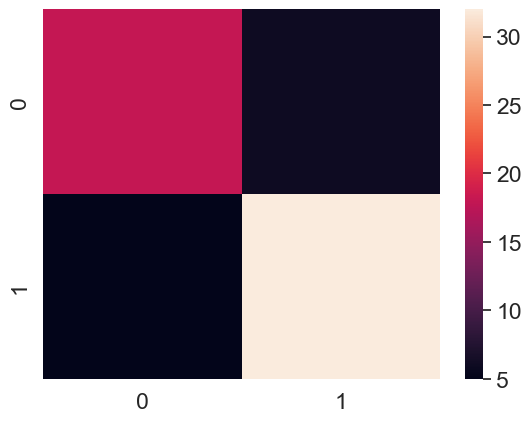

In [29]:
sns.set(font_scale=1.5)

conf_mat=confusion_matrix(y_test,y_preds)

sns.heatmap(conf_mat);

#### Import any module via jupyter

In [30]:
# import sys
# !conda install --yes --prefix {sys.prefix} seaborn

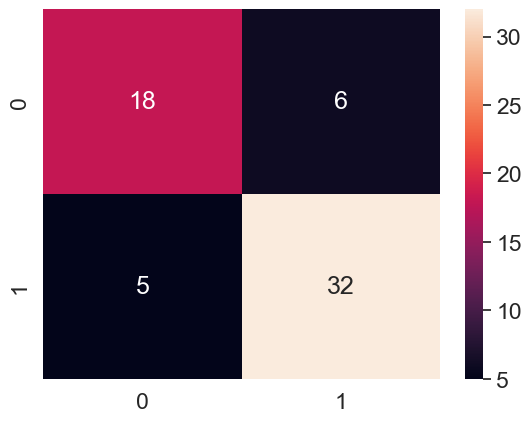

In [31]:
sns.heatmap(conf_mat,annot=True);

In [32]:
import sklearn
sklearn.__version__

'1.3.0'

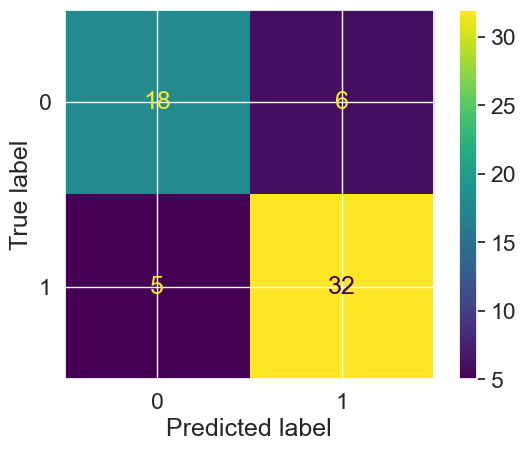

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf,X_test,y_test);

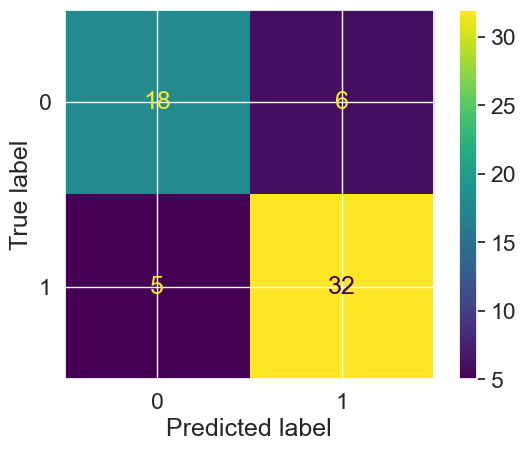

In [34]:
ConfusionMatrixDisplay.from_predictions(y_test,y_preds);

In [35]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.78      0.75      0.77        24
           1       0.84      0.86      0.85        37

    accuracy                           0.82        61
   macro avg       0.81      0.81      0.81        61
weighted avg       0.82      0.82      0.82        61



 `precision=true positives/(true positives+false positives) or =true negatives/(true negatives + false negatives)`

 means kitne 1 sahi aye, total 1 me se jo X_test me hai  or vice versa

 `recall =true positives/(true positives+false negatives) or =true negatives/(true negatives + false positives)`
 
 means kitne 1 sahi aye, total 1 me se jo model ne diye hai or vice versa

In [36]:
from sklearn.datasets import fetch_california_housing
housing =fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [37]:
housing_df=pd.DataFrame(housing["data"],
                       columns=['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'])
housing_df["MedHouseVal"]=housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [38]:
housing_df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [39]:
from sklearn.model_selection import train_test_split
X=housing_df.drop("MedHouseVal",axis=1)
y=housing_df["MedHouseVal"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
model=RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8012774167558389

In [40]:
from sklearn.metrics import confusion_matrix
y_preds=model.predict(X_test)
y_preds

array([2.9732806, 3.3095704, 5.00001  , ..., 2.7549801, 0.90558  ,
       0.80157  ])

In [41]:
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.2632291117082569


In [42]:
y_test_mean=np.full(len(y_test),y_test.mean())
y_test_mean[:10]

array([2.06484274, 2.06484274, 2.06484274, 2.06484274, 2.06484274,
       2.06484274, 2.06484274, 2.06484274, 2.06484274, 2.06484274])

In [43]:
from sklearn.metrics import r2_score
r2_score(y_test,y_preds)

0.8012774167558389

In [44]:
r2_score(y_test,y_test_mean)

0.0

In [45]:
r2_score(y_test,y_test)

1.0

In [46]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

0.3293310641715118

In [47]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_preds)

0.2632291117082569

In [48]:
X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
clf=RandomForestClassifier()
clf.fit(X_train,y_train)
from sklearn.model_selection import cross_val_score
print(cross_val_score(clf,X,y,cv=5))

[0.83606557 0.8852459  0.83606557 0.8        0.75      ]


In [49]:
np.random.seed(42)
print(cross_val_score(clf,X,y,cv=5,scoring="precision"))

[0.82352941 0.93548387 0.84848485 0.79411765 0.76315789]


In [50]:
np.random.seed(42)
cross_val_recall=cross_val_score(clf,X,y,cv=5,scoring="recall")
cross_val_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [51]:
print(f"Mean of recall value={np.mean(cross_val_recall)*100:.2f}%")

Mean of recall value=85.45%


In [52]:
from sklearn.model_selection import train_test_split
X=housing_df.drop("MedHouseVal",axis=1)
y=housing_df["MedHouseVal"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
model=RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [53]:
from sklearn.model_selection import cross_val_score
r2_value=cross_val_score(model,X,y,cv=3,scoring=None)
r2_value

array([0.61664815, 0.72416579, 0.62138463])

In [54]:
from sklearn.model_selection import cross_val_score
mse=cross_val_score(model,X,y,cv=3,scoring="neg_mean_squared_error")
np.mean(mse)

-0.45777196104248397

In [55]:
mse

array([-0.50077821, -0.33216927, -0.5403684 ])

In [56]:
mae=cross_val_score(model,X,y,cv=3,scoring="neg_mean_absolute_error")
np.mean(mae)

-0.481087473638566

In [57]:
mae

array([-0.51966761, -0.42157663, -0.50201819])

#### Improving a model

In [75]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    on a classification.
    """
    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

In [76]:

heart_disease_shuffled=heart_disease.sample(frac=1)
X=heart_disease_shuffled.drop("target",axis=1)
y=heart_disease_shuffled["target"]

# Splitting Data

train_split=round(0.7*len(heart_disease_shuffled))
valid_split=round(train_split+0.15*len(heart_disease_shuffled))

X_train,y_train=X[:train_split],y[:train_split]
X_valid,y_valid=X[train_split:valid_split],y[train_split:valid_split]
X_test,y_test=X[valid_split:],y[valid_split:]

In [77]:
len(X),len(X_train),len(X_valid),len(X_test)

(303, 212, 45, 46)

In [86]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
clf=RandomForestClassifier()
clf.fit(X_train,y_train)
y_preds=clf.predict(X_valid)

baseline_metrics=evaluate_preds(y_valid, y_preds)

Acc: 82.22%
Precision: 0.94
Recall: 0.71
F1 score: 0.81


In [92]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
clf_2=RandomForestClassifier(n_estimators=40)
clf_2.fit(X_train,y_train)
y_preds_2=clf.predict(X_valid)

clf_2_metric=evaluate_preds(y_valid, y_preds_2)

Acc: 82.22%
Precision: 0.94
Recall: 0.71
F1 score: 0.81


In [94]:
np.random.seed(42)
clf_2 = RandomForestClassifier(n_estimators=10)
clf_2.fit(X_train, y_train)
y_preds_2 = clf_2.predict(X_valid)

clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Acc: 84.44%
Precision: 0.90
Recall: 0.79
F1 score: 0.84


In [103]:
np.random.seed(42)
clf_3 = RandomForestClassifier(n_estimators=10,max_depth=4)
clf_3.fit(X_train, y_train)
y_preds_3 = clf_3.predict(X_valid)

clf_3_metrics = evaluate_preds(y_valid, y_preds_3)

Acc: 91.11%
Precision: 1.00
Recall: 0.83
F1 score: 0.91


In [131]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ['auto', 'sqrt'],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid, 
                            n_iter=10, # number of models to try
                            cv=5,
                            verbose=2,
                            random_state=42,
                            refit=True)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimato

C:\Users\jigya\Desktop\sample_project\env\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jigya\Desktop\sample_project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jigya\Desktop\sample_project\env\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\jigya\Desktop\sample_project\env\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parame

In [126]:
rs_clf.best_params_

{'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [127]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 83.61%
Precision: 0.81
Recall: 0.91
F1 score: 0.85


In [128]:
grid_2 = {'n_estimators': [100, 200, 500],
          'max_depth': [None],
          'max_features': ['log2', 'sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2]}

In [118]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2, 
                      cv=5,
                      verbose=2)

# Fit the GridSearchCV version of clf
gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, 

In [119]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 100}

In [121]:
# Make predictions with the best hyperparameters
gs_y_preds = gs_clf.predict(X_test)

# Evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 85.25%
Precision: 0.81
Recall: 0.94
F1 score: 0.87


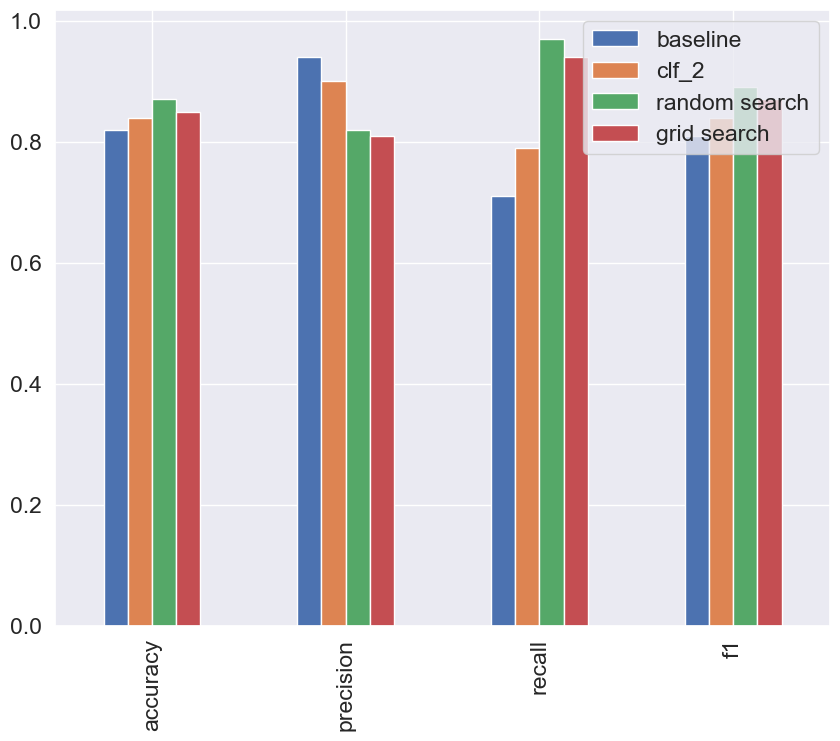

In [122]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf_2": clf_2_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics})

compare_metrics.plot.bar(figsize=(10, 8));

In [132]:
import pickle

# Save an extisting model to file
pickle.dump(gs_clf, open("gs_random_random_forest_model_1.pkl", "wb"))
# Load a saved model
loaded_pickle_model = pickle.load(open("gs_random_random_forest_model_1.pkl", "rb"))
# Make some predictions
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Acc: 85.25%
Precision: 0.81
Recall: 0.94
F1 score: 0.87


{'accuracy': 0.85, 'precision': 0.81, 'recall': 0.94, 'f1': 0.87}

In [133]:
from joblib import dump, load

# Save model to file
dump(gs_clf, filename="gs_random_forest_model_1.joblib")
['gs_random_forest_model_1.joblib']
# Import a saved joblib model
loaded_joblib_model = load(filename="gs_random_forest_model_1.joblib")
# Make and evaluate joblib predictions
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 85.25%
Precision: 0.81
Recall: 0.94
F1 score: 0.87


{'accuracy': 0.85, 'precision': 0.81, 'recall': 0.94, 'f1': 0.87}

In [134]:
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [135]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing labels
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Define different features and transformer pipeline
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))
])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
                    transformers=[
                        ("cat", categorical_transformer, categorical_features),
                        ("door", door_transformer, door_feature),
                        ("num", numeric_transformer, numeric_features)
                    ])

# Creating a preprocessing and modelling pipeline
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model", RandomForestRegressor())])

# Split data
X = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

In [139]:
# Use GridSearchCV with our regression Pipeline
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["sqrt"],
    "model__min_samples_split": [2, 4]    
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_sampl

[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.7s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.6s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.6s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strate

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': ['sqrt'],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [140]:
gs_model.score(X_test, y_test)

0.2848784564026805